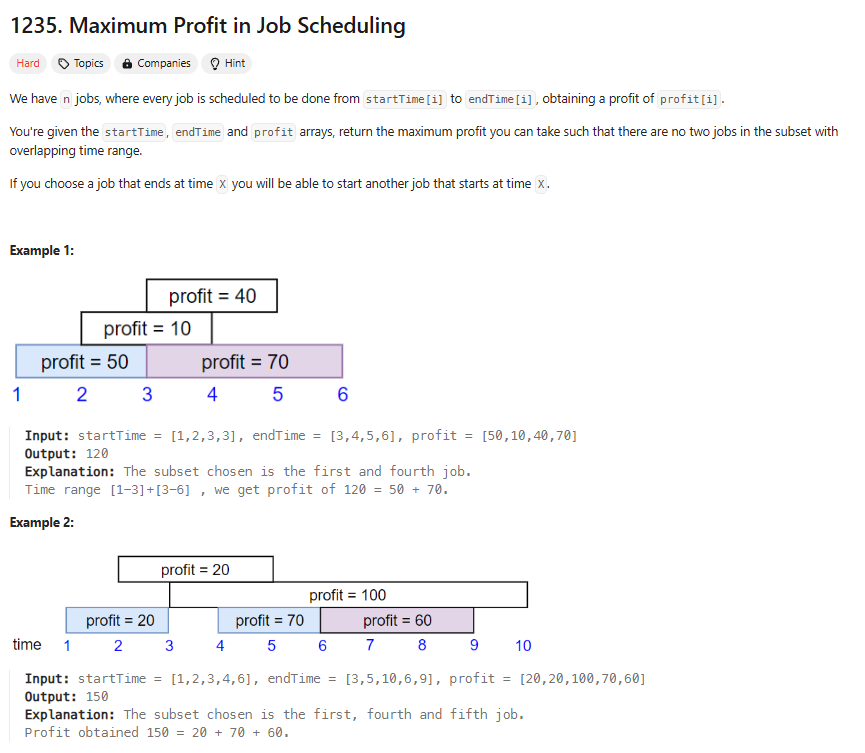

In [ ]:
class Solution:

    def jobScheduling(self, startTime: List[int], endTime: List[int], profit: List[int]) -> int:
        if len(endTime) < 2:
            return profit[0]

        sortEndIndices = list(range(len(endTime)))
        sortEndIndices.sort(key=lambda x: endTime[x])
        
        subProfit = [0] * (len(endTime) + 1)
        subProfit[1] = profit[sortEndIndices[0]]
        
        def nonOverLapping(task_idx):
            nonlocal startTime, endTime, sortEndIndices
            s, e = 0, task_idx - 1
            while s <= e:
                m = (s + e) // 2
                if endTime[sortEndIndices[m]] <= startTime[sortEndIndices[task_idx]]:
                    s = m + 1
                
                else:
                    e = m - 1
            return e

        for task_count in range(2, len(subProfit)):
            task_idx = task_count - 1
            subProfit[task_count] = max(subProfit[nonOverLapping(task_idx) + 1] + profit[sortEndIndices[task_idx]],
            subProfit[task_count - 1])

        return subProfit[-1]